In [62]:
import os
import numpy as np
import random
import timeit

from bisect import bisect_right, bisect_left

In [2]:
class Rectangle():
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
        
    def GetCentroid(self):
        return (self.x + self.width/2.0, self.y + self.height/2.0)

In [3]:
class UUIDRectangle(Rectangle):
    def __init__(self, x, y, width, height, uuid):
        super().__init__(x, y, width, height)
        self.assigned_to_set = False
        self.uuid = uuid

In [4]:
def PrintMaximalSet(maximal_set):
    for i, rectangle in enumerate(maximal_set):
        if i < len(maximal_set) - 1:
            print("{}, ".format(rectangle.uuid), end = '')
        else: 
            print("{}".format(rectangle.uuid), end = '')

In [5]:
def PrintMaximalSets(maximal_sets):
    for maximal_set in sorted(maximal_sets, key=len, reverse=True):
        PrintMaximalSet(maximal_set)
        print('')

In [6]:
def GetIntersectionMembers(curr, rectangles):
    remainder = rectangles

    # x axis
    remainder.sort(key=lambda r: r.x + r.width)
    list_bc2 = [r.x + r.width for r in remainder] 
    idx = bisect_right(list_bc2, curr.x)
    remainder = remainder[max(0,idx):]

    remainder.sort(key=lambda r: r.x)
    list_bc1 = [r.x for r in remainder] 
    idx = bisect_left(list_bc1, curr.x + curr.width)
    remainder = remainder[0:min(idx, len(remainder))]

    # y axis
    remainder.sort(key=lambda r: r.y + r.height)
    list_bc2 = [r.y + r.height for r in remainder] 
    idx = bisect_right(list_bc2, curr.y)
    remainder = remainder[max(0,idx):]

    remainder.sort(key=lambda r: r.y)
    list_bc1 = [r.y for r in remainder] 
    idx = bisect_left(list_bc1, curr.y + curr.height)
    remainder = remainder[0:min(idx, len(remainder))]
    
    intersection_members = remainder
    
    return intersection_members
    

In [7]:
rectangle_1 = UUIDRectangle(1, 1, 5, 5, 1)
rectangle_2 = UUIDRectangle(4, 4, 3, 3, 2)
rectangle_3 = UUIDRectangle(6, 1, 1, 1, 3)
rectangle_4 = UUIDRectangle(2, 2, 3, 3, 4)
rectangle_5 = UUIDRectangle(1, 4, 1, 3, 5)

rectangles = [rectangle_1, rectangle_2, rectangle_3, rectangle_4, rectangle_5]

In [8]:
def CreateRectanglesFromData():
    rectangles = []
    data = np.loadtxt(os.getcwd() + '/rectangles.txt')

    for i in range(0, data.shape[0]):
        rectangle = UUIDRectangle(data[i,0], data[i,0], data[i,0], data[i,0], i)
        rectangles.append(rectangle)
    
    return rectangles

In [9]:
def BuildGraph(rectangles):
    G = {}
    for r in rectangles:
        G[r.uuid] = []
        intersects = GetIntersectionMembers(r, rectangles)
        for i in intersects:
            if i.uuid == r.uuid: continue
            G[r.uuid].append(i.uuid)
                
    return G

In [10]:
def BK(R, P, X, G, max_sets):
    if len(P) == 0 and len(X) == 0:
        max_sets.append(R)
    
    for v in list(P):
        N_v = set(G[v])
        max_sets = BK(R.union(set({v})), P.intersection(N_v), X.intersection(N_v), G, max_sets)
        P.remove(v)
        X.add(v)
        
    return max_sets

In [57]:
def BKWithPivot(R, P, X, G, max_sets):
    if len(P) == 0 and len(X) == 0:
        max_sets.append(R)
    
    u = random.sample(P.union(X), 1)[0]
    N_u = set(G[u])
    for v in list(P.difference(N_u)):
        N_v = set(G[v])
        max_sets = BK(R.union(set({v})), P.intersection(N_v), X.intersection(N_v), G, max_sets)
        P.remove(v)
        X.add(v)
        
    return max_sets

In [58]:
def FindMaxSets(rectangles, pivot = False):
    R = set()
    X = set()
    G = BuildGraph(rectangles)
    P = set(G.keys())
    max_sets = []
    
    if pivot:
        BKWithPivot(R, P, X, G, max_sets)
        return max_sets, 
    else:
        return BK(R, P, X, G, max_sets)

In [59]:
FindMaxSets(rectangles)

[{1, 2, 4}, {1, 5}, {3}]

In [60]:
FindMaxSets(CreateRectanglesFromData()[0:20])

[{0, 1, 3, 5, 8, 12, 13, 14, 16, 17, 18},
 {1, 2, 3, 6, 8, 11, 15, 16},
 {2, 6, 7, 11, 15},
 {7, 19},
 {9},
 {10}]

In [79]:
FindMaxSets(CreateRectanglesFromData()[0:20], pivot=True)

[{0, 1, 3, 5, 8, 12, 13, 14, 16, 17, 18},
 {1, 2, 3, 6, 8, 11, 15, 16},
 {2, 6, 7, 11, 15},
 {9},
 {10},
 {7, 19}]

In [69]:
print("BK time: {}".format(timeit.timeit(stmt='''{} '''.format(FindMaxSets(CreateRectanglesFromData()[0:20])))))

BK time: 0.5733695350008929


In [74]:
print("BK pivot time: {}".format(timeit.timeit(stmt='''{} '''.format(FindMaxSets(CreateRectanglesFromData()[0:20], pivot = True)))))

BK pivot time: 0.5664282150009967


In [80]:
data = np.loadtxt("rectangles.txt")

In [81]:
data.shape

(100000, 4)

In [83]:
import matplotlib.pyplot as plt

AttributeError: module 'matplotlib.pyplot' has no attribute 'add_patch'

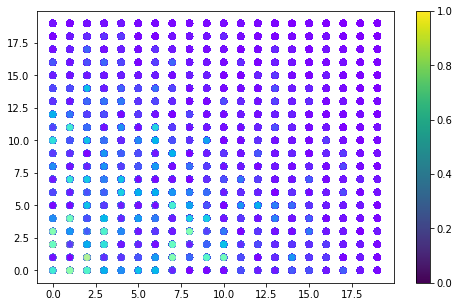

In [151]:
plt.figure(figsize=(8, 5))
import matplotlib.cm as cm
c_in = data[:,3]*data[:,2]
c_in = c_in / np.amax(c_in)
colors = cm.rainbow(c_in)

plt.scatter(data[:,0], data[:,1], c=colors)
plt.colorbar()
plt.show()

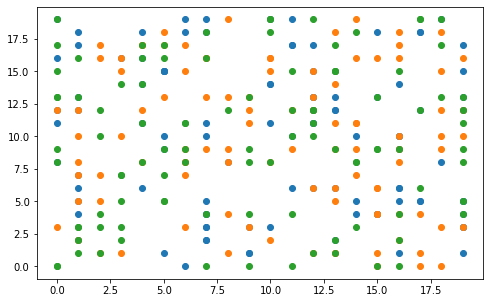

In [96]:
plt.figure(figsize=(8, 5))
plt.scatter(data[0:100,0], data[0:100,1])
plt.scatter(data[1000:1100,0], data[1000:1100,1])
plt.scatter(data[10000:10100,0], data[10000:10100,1])
plt.show()

In [98]:
np.unique(data, axis=0).shape

(33241, 4)

In [99]:
np.unique(data[:,0:2], axis=0).shape

(400, 2)

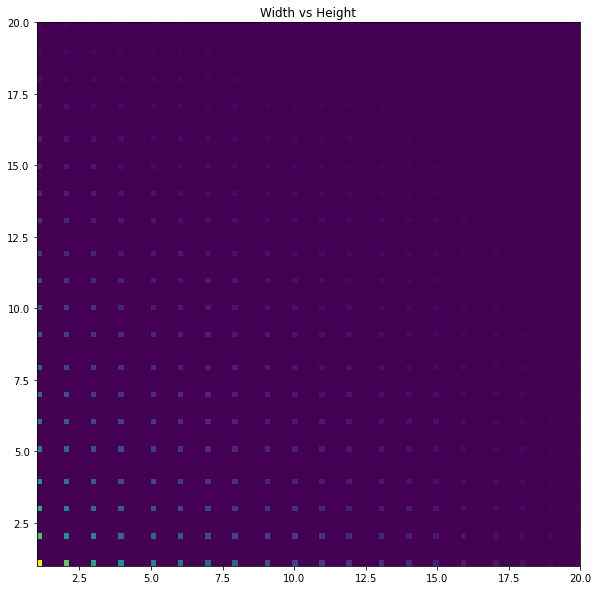

In [128]:
H, xedges, yedges = np.histogram2d(data[:,2], data[:,3], bins=100)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, title='Width vs Height', aspect='equal')
X, Y = np.meshgrid(xedges, yedges)
ax.pcolormesh(X, Y, H)
plt.show()

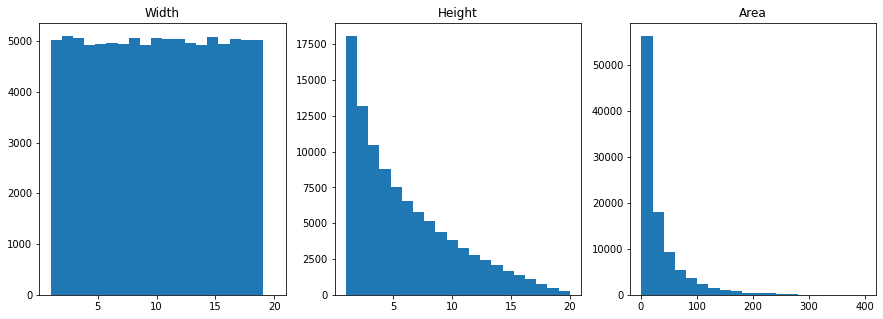

In [145]:
hist, bins = np.histogram(data[:,2], bins=20)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.hist(data[:,0], bins)
ax1.title.set_text('Width')

hist, bins = np.histogram(data[:,3], bins=20)
ax2.hist(data[:,3], bins)
ax2.title.set_text('Height')

hist, bins = np.histogram(data[:,2]*data[:,3], bins=20)
ax3.hist(data[:,2]*data[:,3], bins)
ax3.title.set_text('Area')
    
fig.set_figheight(5)
fig.set_figwidth(15)
plt.show()

In [148]:
idx_max = np.argmax(data[:,2]*data[:,3])

In [150]:
data[idx_max,:]

array([ 0.,  0., 20., 20.])